# Documentação fuzzylite

https://fuzzylite.github.io/fuzzylite/?q=documentation

pip install pyfuzzylite

# Mandami

## Dimmer Controller

In [7]:
import fuzzylite as fl
import numpy as np
#Declaring and Initializing the Fuzzy Engine
engine = fl.Engine(
name="SimpleDimmer",description="Simple Dimmer Fuzzy System which dims light based upon Light Conditions")
#Defining the Input Variables (Fuzzification)
engine.input_variables = [
fl.InputVariable(
name="Ambient",
description="",
enabled=True,
minimum=0.000,
maximum=1.000,
lock_range=False,
terms=[
fl.Triangle("DARK", 0.000, 0.250, 0.500), #Triangular Membership Function defining "Dark"
fl.Triangle("MEDIUM", 0.250, 0.500, 0.750), #Triangular Membership Function defining "Medium"
fl.Triangle("BRIGHT", 0.500, 0.750, 1.000) #Triangular Membership Function defining "Bright"
])]
#Defining the Output Variables (Defuzzification)
engine.output_variables = [
fl.OutputVariable(
name="Power",
description="",
enabled=True,
minimum=0.000,
maximum=1.000,
lock_range=False,
aggregation=fl.Maximum(),
defuzzifier=fl.Centroid(200),
lock_previous=False,
terms=[
fl.Triangle("LOW", 0.000, 0.250, 0.500), #Triangular Membership Function defining "LOW Light"
fl.Triangle("MEDIUM", 0.250, 0.500, 0.750), #Triangular Membership Function defining "MEDIUM light"
fl.Triangle("HIGH", 0.500, 0.750, 1.000) #Triangular Membership Function defining "HIGH Light"
] )
]
#Creation of Fuzzy Rule Base
engine.rule_blocks = [
fl.RuleBlock(
name="",
description="",
enabled=True,
conjunction=fl.Minimum(),
disjunction=fl.Maximum(),
implication=fl.Minimum(),
activation=fl.General(),
rules=[
fl.Rule.create("if Ambient is DARK then Power is HIGH", engine),
fl.Rule.create("if Ambient is MEDIUM then Power is MEDIUM", engine),
fl.Rule.create("if Ambient is BRIGHT then Power is LOW",engine)
] )
]

In [8]:
x = np.linspace(0.01,0.99,50)
entrada_iluminacao = engine.input_variable("Ambient")
potencia_iluminacao = engine.output_variable("Power")
saida_potencia = []
for i in x:
  entrada_iluminacao.value = i
  engine.process()
  saida_potencia.append(potencia_iluminacao.value)

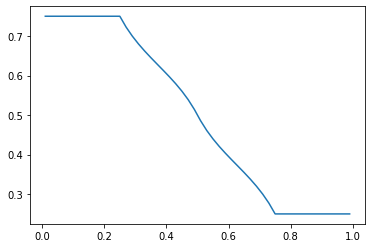

In [9]:
import matplotlib.pyplot as plt
plt.plot(x,saida_potencia)

# Takagi Sugeno Kang Fuzzy Inference System

In [10]:
import fuzzylite as fl
#Declaring and Initializing the Fuzzy Engine
engine = fl.Engine(
    name="SimpleDimmer",
    description="Simple Dimmer Fuzzy System which dims light based upon Light       Conditions"
)
#Defining the Input Variables (Fuzzification)
engine.input_variables = [
	fl.InputVariable(
    	name="Ambient",
    	description="",
    	enabled=True,
    	minimum=0.000,
    	maximum=1.000,
    	lock_range=False,
    	terms=[
        	fl.Triangle("DARK", 0.000, 0.250, 0.500), #Triangular Membership Function defining “Dark”
        	fl.Triangle("MEDIUM", 0.250, 0.500, 0.750), #Triangular Membership Function defining “Medium”
        	fl.Triangle("BRIGHT", 0.500, 0.750, 1.000) #Triangular Membership Function defining “Bright”
    	]
	)
]
#Defining the Output Variables (Defuzzification)
engine.output_variables = [
	fl.OutputVariable(
    	name="Power",
    	description="",
    	enabled=True,
    	minimum=0.000,
    	maximum=1.000,
    	lock_range=False,
    	aggregation=None,
    	defuzzifier=fl.WeightedAverage("TakagiSugeno"),
    	lock_previous=False,
    	terms=[
        	fl.Constant("LOW", 0.250), #Constant Membership Function defining “LOW”
        	fl.Constant("MEDIUM", 0.500), #Constant Membership Function defining “MEDIUM”
        	fl.Constant("HIGH", 0.750) #Constant Membership Function defining “HIGH”
    	]
	)
]
#Creation of Fuzzy Rule Base
engine.rule_blocks = [
	fl.RuleBlock(
    	name="",
    	description="",
    	enabled=True,
    	conjunction=None,
    	disjunction=None,
    	implication=None,
    	activation=fl.General(),
    	rules=[
        	fl.Rule.create("if Ambient is DARK then Power is HIGH", engine),
        	fl.Rule.create("if Ambient is MEDIUM then Power is MEDIUM", engine),
        	fl.Rule.create("if Ambient is BRIGHT then Power is LOW", engine)
    	]
	)
]

In [11]:
x = np.linspace(0.01,0.99,50)
entrada_iluminacao = engine.input_variable("Ambient")
potencia_iluminacao = engine.output_variable("Power")
saida_potencia = []
for i in x:
  entrada_iluminacao.value = i
  engine.process()
  saida_potencia.append(potencia_iluminacao.value)

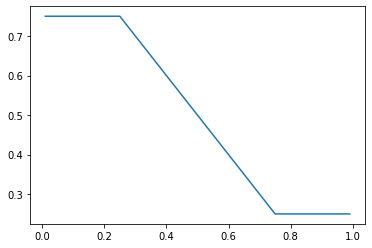

In [12]:
import matplotlib.pyplot as plt
plt.plot(x,saida_potencia)